In [1]:
import numpy as np

In [ ]:
'''
practice session from this video https://www.youtube.com/watch?v=b6yrn6FqTvs
Q1: What are the odds of getting 3 heads in a row if heads has a probability p?
Q2: What is the probability of ending on 3 heads in N tosses?
Q3: What is the probability that 3 heads in a row happens at N?
'''

In [39]:
# Number of coin tosses
N = 10

P0 = np.array([[0.5, 0.5, 0, 0],
               [0.5, 0, 0.5, 0],
               [0.5, 0, 0, 0.5],
               [0.5, 0, 0, 0.5]])

P1 = np.array([[0.5, 0.5, 0, 0],
               [0.5, 0, 0.5, 0],
               [0.5, 0, 0, 0.5],
               [0, 0, 0, 1]])

In [40]:

hits = []

# Simulation 1
for i in range(10000):
    chain = []
    flag = True
    for j in range(N):
        X = np.random.choice([0,1], p = [1/2, 1/2])
        chain.append(X)
        if len(chain)>2:
            if chain[-1] == 1 and chain[-2] == 1 and chain[-3] == 1:
                hits.append(1)
                flag = False
                break
    if flag:
        hits.append(0)

In [41]:
hits1 = []

# Simulation 2
for i in range(10000):
    chain = []
    flag = True
    for j in range(N):
        X = np.random.choice([0,1], p = [1/2, 1/2])
        chain.append(X)
    if chain[-1] == 1 and chain[-2] == 1 and chain[-3] == 1:
        hits1.append(1)
    if flag:
        hits1.append(0)

In [42]:
hits2 = []

# Simulation 3
for i in range(10000):
    chain = []
    chains = 0
    falg = True
    for j in range(N):
        x = np.random.choice([0,1], p = [1/2, 1/2])
        chain.append(X)
        if len(chain)>2:
            if chain[-1] == 1 and chain[-2] == 1 and chain[-3] == 1:
                chains += 1
    if chain[-1] == 1 and chain[-2] == 1 and chain[-3] == 1 and chains == 1:
        hits2.append(1)
    else:
        hits2.append(0)


In [43]:
print('Simulated proabbility of seeing 3H chain in N tosses:', np.mean(hits))
print('Simulated probability of seeing 3H chain at the end of N tosses:', np.mean(hits1))
print('Simulated probability of seeing 3H chain for the first time at the end of N tosses:', np.mean(hits2))
print('Q1', np.linalg.matrix_power(P1, N)[0][3])
print('Q2', np.linalg.matrix_power(P0, N)[0][3])
print('Q3', np.linalg.matrix_power(P1, N)[0][3] - np.linalg.matrix_power(P1, N-1)[0][3])

Simulated proabbility of seeing 3H chain in N tosses: 0.5069
Simulated probability of seeing 3H chain at the end of N tosses: 0.10944874877549203
Simulated probability of seeing 3H chain for the first time at the end of N tosses: 0.0
Q1 0.5078125
Q2 0.125
Q3 0.04296875


<ipython-input-1-999fa39ed673>:22: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = min(1, target_distribution(proposed_state) / target_distribution(current_state))


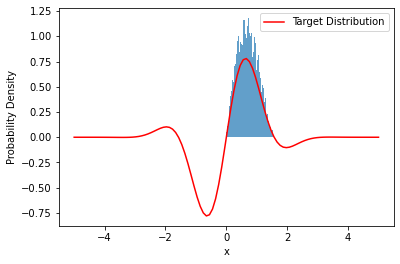

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution
def target_distribution(x):
    return np.exp(-0.5 * x**2) * np.sin(2 * x)

# Define the proposal distribution
def proposal_distribution(x, sigma):
    return np.random.normal(x, sigma)

# Define the MCMC algorithm
def mcmc_algorithm(num_samples, initial_state, sigma):
    samples = [initial_state]
    current_state = initial_state

    for _ in range(num_samples):
        # Generate a proposal state
        proposed_state = proposal_distribution(current_state, sigma)

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_state) / target_distribution(current_state))

        # Accept or reject the proposal state
        if np.random.uniform() < acceptance_ratio:
            current_state = proposed_state

        samples.append(current_state)

    return samples

# Set the parameters
num_samples = 10000
initial_state = 0
sigma = 0.5

# Run the MCMC algorithm
samples = mcmc_algorithm(num_samples, initial_state, sigma)

# Plot the samples
plt.hist(samples, bins=50, density=True, alpha=0.7)
x = np.linspace(-5, 5, 100)
plt.plot(x, target_distribution(x), 'r-', label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
